# **Employee Performance Analysis**

**Objective:** This Analysis aims to analyze the performance of associates in lead generation activities. It includes data cleaning, descriptive analysis, visualization, and predictive modeling to provide actionable insights for the Business Development Team.

<b>DATASET</b>

We are provided with a dataset containing the daily lead generation activities infomation of three employees. So there are three sheets, each including the following variables:

Day : The day of lead generation activities.

Date: The date of lead generation activities.

Leads: The number of leads generated by each employee on a specific date.

Time_Spent (in mins): The total time spent by each employee on lead generation activities on a specific date. The unit of measurement is minutes.

Avg Time Per Lead (mins): The Average time spent by each employee on lead generation activities on a specific date. The unit of measurement is minutes.

Daily Team Review: Daily team review attended or missed by each employee.

No. of Incomplete Leads: The number of incomplete leads by each employee on a specific date.

In [150]:
# import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# reading and loading data - associate Raj,Ali, Arya
df_raj = pd.read_csv('Data Assignment - Raj.csv')
df_ali = pd.read_csv('Data Assignment - Ali.csv')
df_arya = pd.read_csv('Data Assignment - Arya.csv')

df_raj['Associate_name'] = 'Raj'
df_ali['Associate_name'] = 'Ali'
df_arya['Associate_name'] = 'Arya'

df = pd.concat([df_raj,df_ali,df_arya])

# Cleaning the data 
# removing null
df = df.dropna() 


# converting date into datetime
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y') 


# datatype conversion
df[['Leads','No. of Incomplete Leads']] = df[['Leads','No. of Incomplete Leads']].astype(int) 

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 60
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Day                       122 non-null    object        
 1   Date                      122 non-null    datetime64[ns]
 2   Leads                     122 non-null    int32         
 3   Time spent on LG (mins)   122 non-null    float64       
 4   Avg Time Per Lead (mins)  122 non-null    float64       
 5   Daily Team Review         122 non-null    object        
 6   No. of Incomplete Leads   122 non-null    int32         
 7   Associate_name            122 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 7.6+ KB


In [131]:
# descriptive Summary for Raj
df.describe()

,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),No. of Incomplete Leads
count,122.000000,122.000000,122.000000,122.000000
mean,11.459016,206.467213,18.540984,0.213115
std,2.663334,73.365403,7.092246,1.061961
min,4.000000,45.000000,9.000000,0.000000
25%,10.000000,136.500000,11.250000,0.000000
50%,11.000000,205.000000,17.500000,0.000000
75%,13.000000,260.000000,23.750000,0.000000
max,20.000000,370.000000,40.000000,9.000000


`==> ` All the associates generated average leads per day very close to median,indicating consistent performance.
The maximum and minimum values for each associate indicate moderate variability in lead generation. 
Here also we can see some variability in time spent, however Arya has lowest variablity than associate and Raj has Maximum.

The average number of incomplete leads is very low ,indicates good quality control. However outliers can be seen in `No. of Incomplete Leads`.

Lets understand this distribution of numerical columns and detect whether there are any outliers in the dataset using boxplots

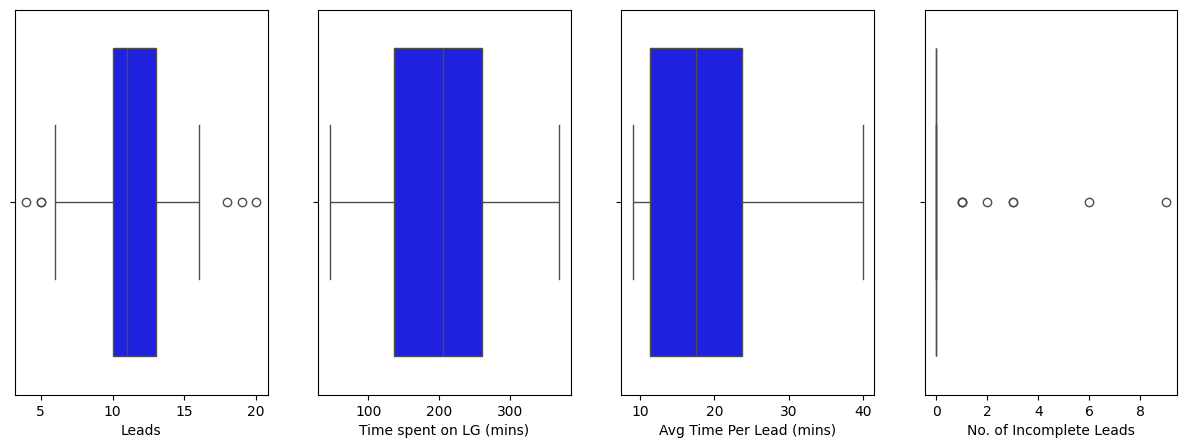

In [132]:
# Create boxplots for numeric columns using subplots
fig, axis = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 5))
# As there are 4 columns, we created subplot having 1 rows and 4 columns.
count = 0 

for i in range(0, 4):
    # Fetching the current column and all rows of that column.
    column = df[['Leads','Time spent on LG (mins)','Avg Time Per Lead (mins)','No. of Incomplete Leads']].iloc[:, count]
    sns.boxplot(x = column, ax = axis[i], color = 'blue')
    count = count + 1

plt.show()

The box plots clearly show the presence of few outliers indicating that there are a few days where associates performance significantly deviates from usual pattern.

Business Problem Statements

`Q1.`Lead Generation Efficiency: Calculate the lead generation efficiency for each associate as the ratio of total leads generated to the total time spent on lead generation. 
Which associate has the highest efficiency?

In [133]:
#Lead Generation Efficiency:
print(f"Lead Generation Efficiency Raj: {(df.loc[df['Associate_name']=='Raj','Leads'].sum()/df.loc[df['Associate_name']=='Raj','Time spent on LG (mins)'].sum()):.3f}")
print(f"Lead Generation Efficiency Raj: {(df.loc[df['Associate_name']=='Ali','Leads'].sum()/df.loc[df['Associate_name']=='Ali','Time spent on LG (mins)'].sum()):.3f}")
print(f"Lead Generation Efficiency Raj: {(df.loc[df['Associate_name']=='Arya','Leads'].sum()/df.loc[df['Associate_name']=='Arya','Time spent on LG (mins)'].sum()):.3f}")

Lead Generation Efficiency Raj: 0.042
Lead Generation Efficiency Raj: 0.053
Lead Generation Efficiency Raj: 0.085


`Interpretation: ` Based on this calculation Arya has the higest lead generation efficiency (0.085). This means that Arya generates more leads per minute spent on lead generation compared to Raj and Ali.

`Q2.` Daily Performance Variability: Determine the standard deviation of the daily number of leads generated by each associate. 
    Which associate shows the highest variability in daily performance?

In [134]:
#Daily Performance Variability 
print(f"Daily Performance Variability \n: {df.groupby('Associate_name')['Leads'].std()}")

Daily Performance Variability 
: Associate_name
Ali     3.039777
Arya    2.156951
Raj     2.687101
Name: Leads, dtype: float64


`Interpretation: ` Ali has the highest standard deviation (3.04). Hence Ali shows the highest variability in daily performance compared to Raj and Arya. This means Ali's number of leads generated fluctuates more from day to day.

`Q 3.` Time Management Analysis: Analyze the relationship between the average time per lead and the total number of leads generated per day for each associate. 
Is there a significant correlation?

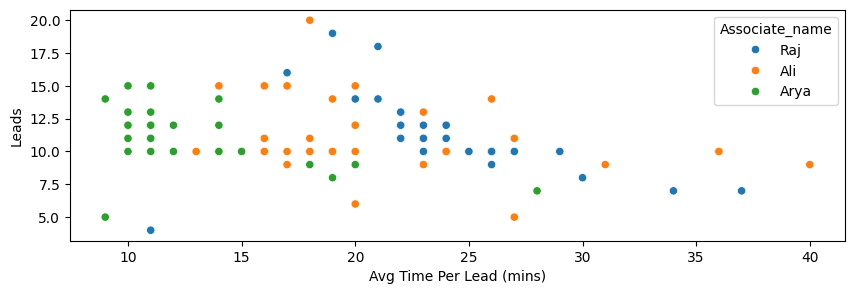

In [135]:
# Create scatter plot to analyze the relationship between the average time per lead and the total number of leads generated.
plt.figure(figsize=(10,3))
sns.scatterplot(x=df['Avg Time Per Lead (mins)'],y=df['Leads'],hue=df['Associate_name'])
plt.show()

There is a negative corelation between the average time per lead and the total number of leads generated per day.

Lets better understand the correlation using `Heatmap`.

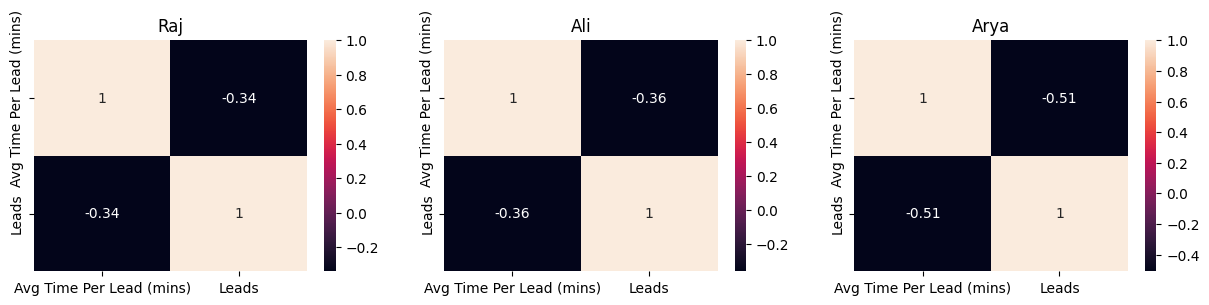

In [136]:
# Create heatmap using subplots
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(15,3))
sns.heatmap(df.loc[df['Associate_name']=='Raj',['Avg Time Per Lead (mins)','Leads']].corr(),annot=True,ax=axis[0]) # corr() is used to calculate the correlation.
axis[0].set_title('Raj')
sns.heatmap(df.loc[df['Associate_name']=='Ali',['Avg Time Per Lead (mins)','Leads']].corr(),annot=True,ax=axis[1])
axis[1].set_title('Ali')
sns.heatmap(df.loc[df['Associate_name']=='Arya',['Avg Time Per Lead (mins)','Leads']].corr(),annot=True,ax=axis[2])
axis[2].set_title('Arya')
plt.show()


`Overall Interpretation: `Arya experiences the most significant drop in lead generation when spending more time per lead, as indicated by the strongest negative correlation (-0.51).

In case of Ali and Raj, their lead generation is less affected by the average time per lead compared to Arya.

This pattern indicates that efficiency in lead generation is crucial for maximizing the number of leads, particularly for Arya. For all associates, reducing the average time per lead could potentially increase their total daily leads.

`Q4.`Compare the average number of leads generated on days when daily team reviews were attended versus missed for each associate.
     What is the percentage difference in performance?

In [137]:
# Create a function to calculate performance difference
def performance_calc(df):
    avg_attend = df[df['Daily Team Review']=='Attended']['Leads'].mean() # average number of leads generated on days when daily team reviews were attended 
    avg_missed = df[df['Daily Team Review']=='Missed']['Leads'].mean() # average number of leads generated on days when daily team reviews were missed
    perform_diff = ((avg_attend - avg_missed) /(avg_missed))*100       # percentage calculation 
    return perform_diff
print(f"Percentage difference in performance for Raj: {performance_calc(df[df['Associate_name']=='Raj']):.2f}%")  
print(f"Percentage difference in performance for Ali: {performance_calc(df[df['Associate_name']=='Ali']):.2f}%")
print(f"Percentage difference in performance for Arya: {performance_calc(df[df['Associate_name']=='Arya']):.2f}%")

Percentage difference in performance for Raj: 9.23%
Percentage difference in performance for Ali: 8.41%
Percentage difference in performance for Arya: nan%


`Interpretation: `The percentage difference indicates that attending daily team reviews has a positive impact on lead generation for Raj and Ali.
                  Arya consistently attended all reviews. Her consistent attendance might indicate a strong commitment to performance.

`Q5.` Incomplete Leads Reduction Over Time: Calculate the trend (using a linear regression model) of the number of incomplete leads over time for each associate. 
Are there any significant improvements or deteriorations?

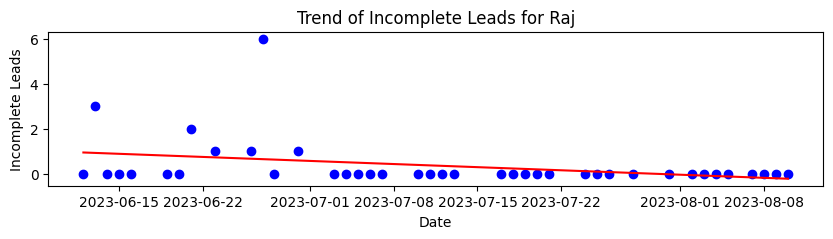

Slope for Raj: -0.019788172326712147
Raj has shown significant improvement over time.


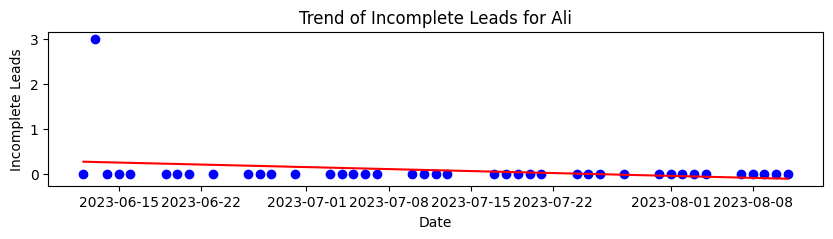

Slope for Ali: -0.0063043235626491076
Ali has shown significant improvement over time.


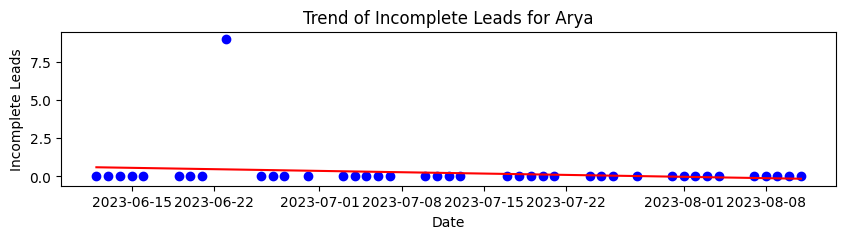

Slope for Arya: -0.012477852030637445
Arya has shown significant improvement over time.


In [138]:
# linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to calculate the trend using linear regression
def calculate_trend(org_df, associate_name):
    # Convert dates to ordinal (numerical values for linear regression)
    df = org_df.copy()
    df['Date_Ordinal'] = df['Date'].apply(lambda x: x.toordinal())
    
    # Prepare the linear regression model
    X = df[['Date_Ordinal']] # Independent variable (Date)
    y = df['No. of Incomplete Leads']  # Dependent variable (Incomplete Leads)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    
    # Calculate the slope and intercept
    slope = lin_reg.coef_[0]
    intercept = lin_reg.intercept_
   
    # Plot the trend
    plt.figure(figsize=(10,2))
    plt.scatter(df['Date'], df['No. of Incomplete Leads'], color='blue')
    plt.plot(df['Date'], lin_reg.predict(X), color='red')
    plt.title(f'Trend of Incomplete Leads for {associate_name}')
    plt.xlabel('Date')
    plt.ylabel('Incomplete Leads')
    plt.show()
    
    # Display the slope and significance
    print(f"Slope for {associate_name}: {slope}")
    
    # Interpretation of the slope
    if slope < 0:
        print(f"{associate_name} has shown significant improvement over time.")
    elif slope > 0:
        print(f"{associate_name} has shown significant deterioration over time.")
    else:
        print(f"No significant change for {associate_name}.")

# Calculate and plot the trend for each associate
calculate_trend(df[df['Associate_name']=='Raj'], 'Raj')
calculate_trend(df[df['Associate_name']=='Ali'], 'Ali')
calculate_trend(df[df['Associate_name']=='Arya'], 'Arya')

`Q6.`Performance Consistency: Calculate the coefficient of variation (CV) for the daily leads generated by each associate. 
     Which associate has the most consistent performance?

In [139]:
# the coefficient of variation (CV)
print(f"CV for Raj: {(df.loc[df['Associate_name']=='Raj','Leads'].std()/df.loc[df['Associate_name']=='Raj','Leads'].mean()*100):.2f}%")
print(f"CV for Ali: {(df.loc[df['Associate_name']=='Ali','Leads'].std()/df.loc[df['Associate_name']=='Ali','Leads'].mean()*100):.2f}%")
print(f"CV for Arya: {(df.loc[df['Associate_name']=='Arya','Leads'].std()/df.loc[df['Associate_name']=='Arya','Leads'].mean()*100):.2f}%")

CV for Raj: 24.65%
CV for Ali: 25.54%
CV for Arya: 18.66%


`Interpretation `This suggests that associate Arya has the most consistent performance because of the lowest CV, indicating very little variation in daily leads generation.
Associate Ali has theleast consistent performance compared to the other associates.

`Q7.`High-Performance Days: Identify the top 10% of days with the highest lead generation for each associate. 
     What is the average time spent on lead generation during these high-performance days?

High-Performance Days for Raj: 


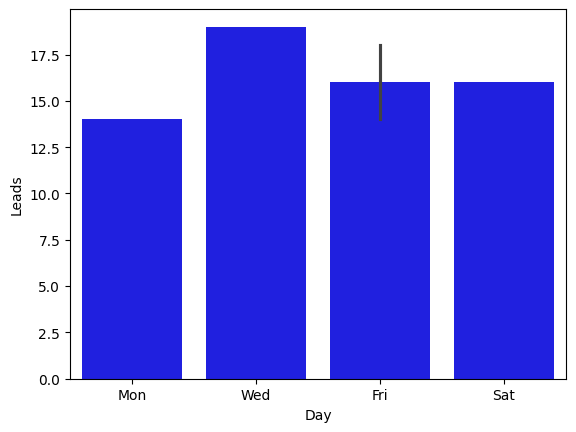


Average Time Spent on LG during High-Performance Days: 314.00 minutes

None
High-Performance Days for Ali: 


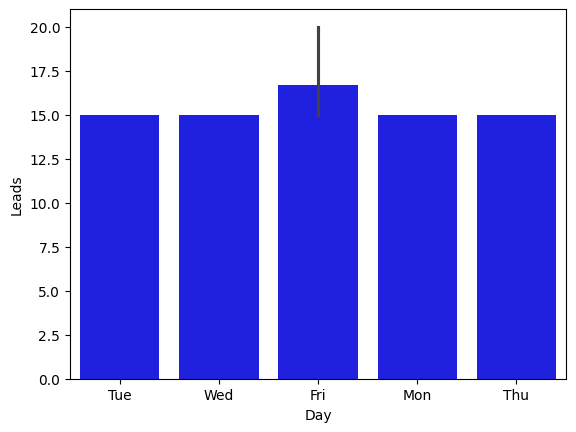


Average Time Spent on LG during High-Performance Days: 251.43 minutes

None
High-Performance Days for Arya: 


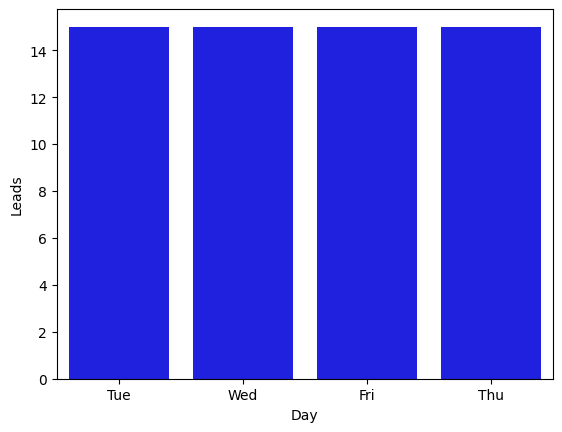


Average Time Spent on LG during High-Performance Days: 161.20 minutes

None


In [140]:
# function to identify top 10% days with highest leads
def high_per_days_calc(df,associate):
    # Calculate the 90th percentile for Leads
    percentile_90 = df['Leads'].quantile(0.90)

    # Filter days where Leads are in the top 10%
    top_10_percent_days = df[df['Leads'] >= percentile_90]

    # Calculate the average time spent on LG during high-performance days
    average_time_spent = top_10_percent_days['Time spent on LG (mins)'].mean()
    print(f"High-Performance Days for {associate}: ")
    sns.barplot(x= top_10_percent_days['Day'],y = top_10_percent_days['Leads'],color='blue')
    plt.show()
    print(f"\nAverage Time Spent on LG during High-Performance Days: {average_time_spent:.2f} minutes\n")

print(high_per_days_calc(df[df['Associate_name']=='Raj'],'Raj'))
print(high_per_days_calc(df[df['Associate_name']=='Ali'],'Ali'))
print(high_per_days_calc(df[df['Associate_name']=='Arya'],'Arya'))    

`Interpretation: `During high-performance days,Raj was most productive on Wednesdays, with an average time spent on lead generation of 314 minutes.
Ali achieved his highest productivity on Fridays, averaging 251.43 minutes. Arya's performance remained consistent across days, with an average of 161.20 minutes.

`Q8.`Impact of Longer Lead Generation Time: Determine if there is a threshold in the time spent on lead generation beyond which the number of leads generated significantly increases. What is the optimal time spent on lead generation for maximizing leads?

In [141]:
# Using a Polynomial Regression Model to identify the optimal time spent
from sklearn.preprocessing import PolynomialFeatures
def optimal_time_calc(df):
    X = df[['Time spent on LG (mins)']]# feature
    y = df['Leads'] #target
    # Fit a Polynomial Regression Model to identify the optimal time spent 
    poly = PolynomialFeatures()
    x_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(x_poly,y)
    #Predict Leads based on the Polynomial Regression Model
    time_spent_range = np.linspace(df['Time spent on LG (mins)'].min(),df['Time spent on LG (mins)'].max(),len(df['Time spent on LG (mins)']))
    leads_pred = poly_model.predict(poly.fit_transform(time_spent_range.reshape(-1,1)))
    # ploting the curve
    plt.scatter(df['Time spent on LG (mins)'],df['Leads'])
    plt.plot(time_spent_range,leads_pred)
    # find the optimal time spent to maximize leads
    optimal_time_spent = time_spent_range[np.argmax(leads_pred)]
    print("Optimal time spent",optimal_time_spent,"on maximum leads",max(leads_pred))

Optimal time spent 370.0 on maximum leads 14.754537847817321


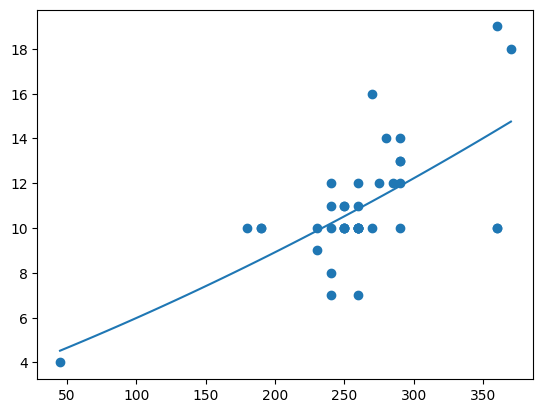

In [142]:
#Raj
optimal_time_calc(df[df['Associate_name']=='Raj'])

Optimal time spent 294.0 on maximum leads 13.877769927064904


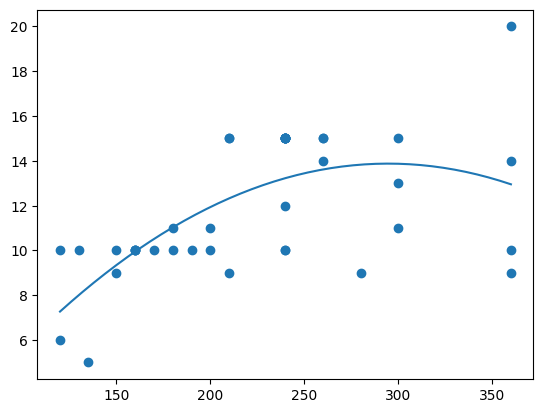

In [143]:
#Ali
optimal_time_calc(df[df['Associate_name']=='Ali'])

Optimal time spent 151.7 on maximum leads 12.206468170896903


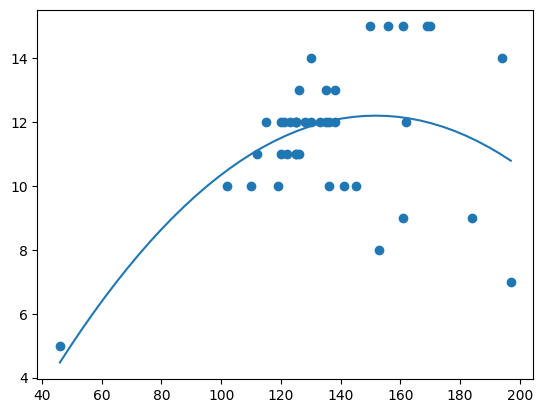

In [144]:
#Arya
optimal_time_calc(df[df['Associate_name']=='Arya'])

`Interpretation: `For all the associates,there is a significant drop in lead generation when spending more time.

`Q9.`Comparative Day Analysis: Calculate the average leads generated on weekdays versus weekends for each associate. 
Are there any notable differences in performance based on the day of the week?

In [145]:
# function to days analysis
def days_analysis(df):
    copy_df = df[['Day','Leads','Associate_name']]
    copy_df['day_type'] = copy_df['Day'].apply(lambda x: 'weekend' if x in ['Sat','Sun'] else 'weekday')
    avg_leads = copy_df.groupby(['Associate_name','day_type'])['Leads'].mean()
    return avg_leads
days_analysis(df)

Associate_name  day_type
Ali             weekday     11.902439
Arya            weekday     11.560976
Raj             weekday     10.769231
                weekend     16.000000
Name: Leads, dtype: float64

`Interpretation: `This highlights Raj’s stronger performance on weekends, while Ali and Arya focus solely on weekdays for lead generation and didn't generate any leads on weekends.

`Q`Predictive Analysis: Using a simple linear regression model, predict the number of leads each associate is expected to generate based on their time spent on lead generation. How accurate is the model when compared to actual data?

In [146]:
#Predictive Analysis
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def perdictive_analysis(df):
    X = df[['Time spent on LG (mins)']] # feature
    y = df['Leads'] # target
    #fitting a lr model and generating prediction
    lin_model = LinearRegression()
    lin_model.fit(X,y)
    leads_predicted = lin_model.predict(X)
    # plotting the actual and the predicted data
    plt.scatter(df['Time spent on LG (mins)'],df['Leads'],label = 'orginal leads')
    plt.plot(df['Time spent on LG (mins)'],leads_predicted,color='black',label = 'fitted linear model')
    plt.scatter(df['Time spent on LG (mins)'],leads_predicted,color = 'red',label = 'Predicted leads')
    plt.legend()
    # Model evaluation
    print(f"R2 Score: {r2_score(y,leads_predicted):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y,leads_predicted):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y,leads_predicted):.3f}")

R2 Score: 0.426
Mean Squared Error: 4.039
Mean Absolute Error: 1.494


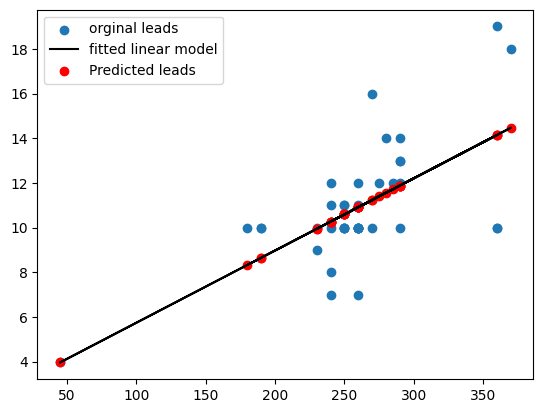

In [147]:
perdictive_analysis(df[df['Associate_name']=='Raj'])

R2 Score: 0.272
Mean Squared Error: 6.559
Mean Absolute Error: 2.051


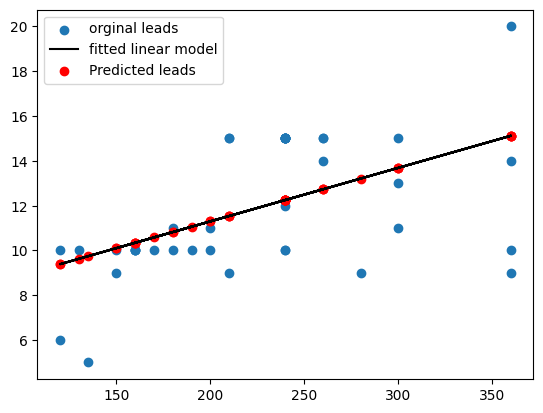

In [148]:
perdictive_analysis(df[df['Associate_name']=='Ali'])

R2 Score: 0.100
Mean Squared Error: 4.085
Mean Absolute Error: 1.494


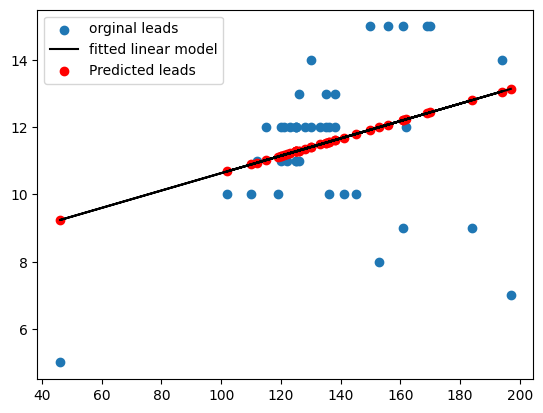

In [149]:
perdictive_analysis(df[df['Associate_name']=='Arya'])

The model has moderate predictive power, but it is not highly accurate. It is due to the some variability in lead generation.

`Conclusion`

Based on the analysis, the following key actions are recommended:

Focus on time management optimization, particularly for Raj and Ali, to improve lead generation efficiency and reduce fluctuations.

Encourage Raj to focus on maintaining momentum throughout the week.

Encourage attendance at daily team reviews to sustain or boost performance.

Maintain consistency by adopting Arya's consistent approach to lead generation.

July was the most productive month. Monitor and address the performance drop in August to maintain productivity levels across all associates.

`Next Steps`

*Monthly Projections:* Based on the current trends, project the expected leads for the next month. Provide target support to associates based on their identified strengths and areas for improvement.

*Continual Monitoring:* Regularly monitor changes in trends and assess the impact of implemented strategies.